In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

In [5]:
data = pd.read_csv('dataset.csv')

In [6]:
data.shape

(91713, 85)

In [7]:
data.size

7795605

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [9]:
data.isna().sum()

encounter_id                       0
patient_id                         0
hospital_id                        0
age                             4228
bmi                             3429
                               ...  
solid_tumor_with_metastasis      715
apache_3j_bodysystem            1662
apache_2_bodysystem             1662
Unnamed: 83                    91713
hospital_death                     0
Length: 85, dtype: int64

In [10]:
data.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [11]:
data.drop(['Unnamed: 83'], axis = 1, inplace = True)

In [12]:
data.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0


In [13]:
data.dropna(axis=0, inplace = True)

In [14]:
data.isna().sum()

encounter_id                   0
patient_id                     0
hospital_id                    0
age                            0
bmi                            0
                              ..
lymphoma                       0
solid_tumor_with_metastasis    0
apache_3j_bodysystem           0
apache_2_bodysystem            0
hospital_death                 0
Length: 84, dtype: int64

In [15]:
data.shape

(56935, 84)

In [41]:
data.groupby(by =['gender']).size()

gender
0    25971
1    30964
dtype: int64

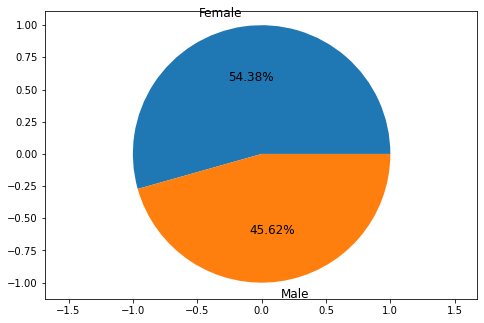

In [42]:
labels = ["Female", "Male"]
# depicting the visualization 
fig = plt.figure() 
ax = fig.add_axes([0,0,1,1]) 

ax.pie(data['gender'].value_counts(), 
       labels = labels,
       autopct ='%1.2f%%',
       frame = True,
       textprops = dict(color ="black", size=12)) 

ax.axis('equal') 
plt.show()

(array([ 1381.,  1857.,  2211.,  3361.,  5241.,  7800., 10325.,  9343.,
         8292.,  7124.]),
 array([16. , 23.3, 30.6, 37.9, 45.2, 52.5, 59.8, 67.1, 74.4, 81.7, 89. ]),
 <BarContainer object of 10 artists>)

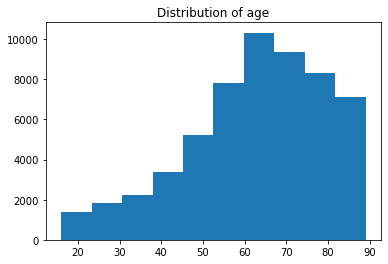

In [16]:
plt.title("Distribution of age")
plt.hist(data.age)

(array([ 4835., 15434., 17074., 10224.,  4877.,  2233.,  1036.,   515.,
          286.,   421.]),
 array([14.84492591, 20.14193229, 25.43893867, 30.73594506, 36.03295144,
        41.32995782, 46.6269642 , 51.92397058, 57.22097697, 62.51798335,
        67.81498973]),
 <BarContainer object of 10 artists>)

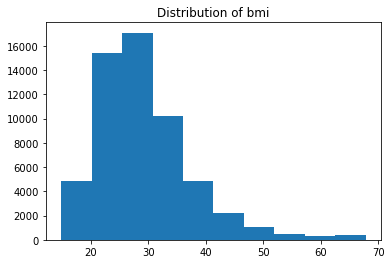

In [29]:
plt.title("Distribution of bmi")
plt.hist(data.bmi)

(array([  450.,   516.,  3089.,  8897.,  8835., 10104., 12700.,  7455.,
         3352.,  1537.]),
 array([137.2  , 143.039, 148.878, 154.717, 160.556, 166.395, 172.234,
        178.073, 183.912, 189.751, 195.59 ]),
 <BarContainer object of 10 artists>)

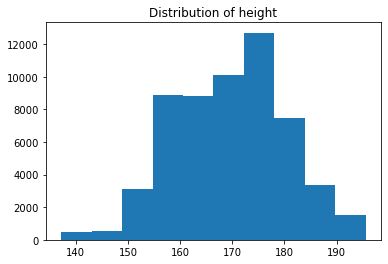

In [30]:
plt.title("Distribution of height")
plt.hist(data.height)

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
data['ethnicity'] = le.fit_transform(data['ethnicity'])
data['gender'] = le.fit_transform(data['gender'])
data['icu_admit_source'] = le.fit_transform(data['icu_admit_source'])
data['icu_stay_type'] = le.fit_transform(data['icu_stay_type'])
data['icu_type'] = le.fit_transform(data['icu_type'])
data['apache_3j_bodysystem'] = le.fit_transform(data['apache_3j_bodysystem'])
data['apache_2_bodysystem'] = le.fit_transform(data['apache_2_bodysystem'])

In [19]:
data.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,66154,25312,118,68.0,22.730000,0,2,1,180.3,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,0,0
1,114252,59342,81,77.0,27.420000,0,2,0,160.0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,6,0
5,33181,74489,83,67.0,27.560000,0,2,1,190.5,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7,4,0
10,105427,125898,77,72.0,28.257052,1,3,0,154.9,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8,6,0
17,22471,112115,118,46.0,25.845717,0,3,1,167.6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,6,0


In [20]:
x = data.iloc[:,0:83]
y = data.iloc[:,83]

In [21]:
x.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,68.0,22.730000,0,2,1,180.3,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,0
1,114252,59342,81,77.0,27.420000,0,2,0,160.0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,6
5,33181,74489,83,67.0,27.560000,0,2,1,190.5,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7,4
10,105427,125898,77,72.0,28.257052,1,3,0,154.9,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8,6
17,22471,112115,118,46.0,25.845717,0,3,1,167.6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,6


In [22]:
y.head

<bound method NDFrame.head of 0        0
1        0
5        0
10       0
17       0
        ..
91698    0
91706    0
91708    0
91709    0
91712    0
Name: hospital_death, Length: 56935, dtype: int64>

In [23]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x)
x = ss.transform(x)

In [24]:
x

array([[ 0.01460283, -1.06703713,  0.18876749, ..., -0.15104653,
         1.20112479, -0.91433962],
       [ 1.28748162, -0.16662997, -0.38334931, ..., -0.15104653,
         0.93712068,  1.28772574],
       [-0.85800377,  0.2341478 , -0.35242408, ..., -0.15104653,
         0.67311657,  0.55370396],
       ...,
       [ 0.68780111,  0.3299037 , -1.17194275, ...,  6.62047647,
         1.20112479, -0.91433962],
       [ 0.01367658, -1.37994383,  0.23515534, ..., -0.15104653,
         1.20112479, -0.91433962],
       [-1.69189313, -0.31824128, -0.02770914, ..., -0.15104653,
        -0.91090807, -0.54732873]])

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [26]:
from sklearn.metrics import accuracy_score
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print(i,accuracy_score(y_test,y_pred))

1 0.8949679459032229
2 0.9169228067094055
3 0.9162202511636076
4 0.9189426539035742
5 0.9192061122332484
6 0.9192939316764732
7 0.920962501097743
8 0.9211381399841925
9 0.9221041538596645
10 0.9208746816545184
11 0.9230701677351365
12 0.9215772372003161
13 0.9228067094054624
14 0.921928514973215
15 0.9220163344164398
16 0.920962501097743
17 0.9218406955299904
18 0.9206112233248441
19 0.9216650566435409


In [27]:
from sklearn.tree import DecisionTreeClassifier as dtree
ct = dtree(
           criterion="entropy",    # Alternative 'gini'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
ct.fit(x_train,y_train)
y_te = ct.predict(x_test)
accuracy_score(y_test,y_te)

0.8804777377711426

In [28]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

y_pred1=clf.predict(x_test)
accuracy_score(y_test,y_pred1)

0.9280758759989461